# Abtastung und Filterung eines Sensorsignals

Python-Musterlösung zur Übungsaufgabe "Filterung abgetasteter Signale"

In [1]:
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, 
                   linspace, array, zeros, ones)
import numpy as np
import scipy.signal as sig

import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel)
plt.rcParams.update({'figure.figsize': (10,4)}) # set figures' size in inches

# ------------ Define variables ----------------
Ts = 1/200     # sampling period
f1 = 50.0        # signal frequency
phi0  = 0        # signal initial phase
tstep = 1e-3     # time step for "analog" signal
Tmax = max(6.0/f1, 10*Ts) # timespan for 6 signal periods or 10 Ts
N_Ts = Tmax / Ts # number of samples in Tmax
# -- Calculate time-vectors and input signals ---
t = arange(0,Tmax,tstep)  # (start,stop,step)
n = arange(0,round(N_Ts)) # sample n, step = 1 
xt = 1.5 + 0.5*cos(2.0*pi*f1*t + phi0) # x(t).
xn = 1.5 + 0.5*cos(2.0*pi*f1*n*Ts + phi0) # x[n]
#xn = zeros(len(xn)); xn[0] = 1 # Dirac-Stoß

  n :     0     1     2     3     4     5     6     7     8     9
x[n]:  2.00  1.50  1.00  1.50  2.00  1.50  1.00  1.50  2.00  1.50
y[n]:  2.00  5.50 10.00 12.00 13.00 13.50 14.00 13.50 13.00 13.50

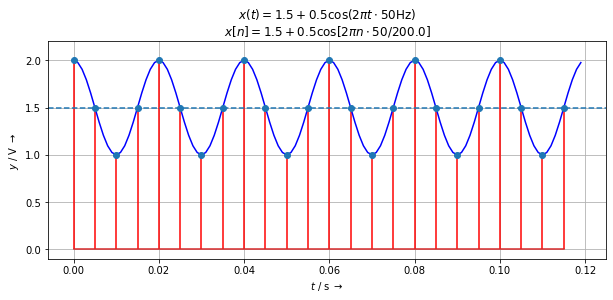

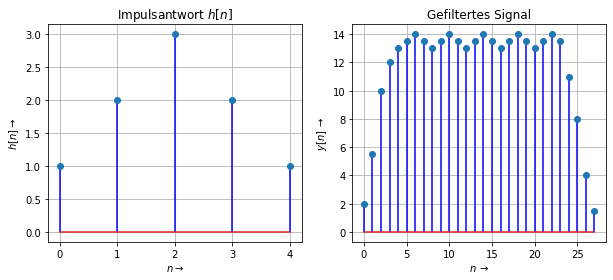

In [2]:
# ----- Plot "analog" and sampled signals -----
fig1, (ax1) = plt.subplots(1,1); grid(True)
ax1.set_xlabel(r'$t$ / s $\rightarrow$')
ax1.set_ylabel(r'$y$ / V $\rightarrow$')
ax1.set_title('$x(t) = 1.5 + \
0.5 \cos(2 \pi t \cdot 50 \mathrm{Hz})$\n\
$x[n] = 1.5 + 0.5 \cos[2 \pi n \cdot 50 / %.1f]$'\
%(1./Ts))
ax1.plot(t, xt, 'b-') # x(t) with blue line
ax1.stem(n*Ts, xn, linefmt='r-',use_line_collection=True) # x[n], red stems
ax1.set_ylim(-0.1, 2.2)   # set y-limits to ymin, ymax
# horizontal line at y = 1.5
ax1.axhline(1.5, linestyle='--') 
# ------- Impulse response ------------------
fig2, (ax2, ax3) = plt.subplots(nrows=1,ncols=2)
h = [1, 2, 3, 2, 1] # impulse response MA-filter
#h = np.convolve([1,1,1],[1,1,1]) # cascaded filt.
#h = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125] # ~IIR
ax2.stem(range(len(h)), h, 'b-', use_line_collection=True) # plot h[n]
ax2.set_xlabel(r'$n \rightarrow$')
ax2.set_ylabel(r'$h[n] \rightarrow$')
ax2.set_title(r'Impulsantwort $h[n]$'); 
ax2.grid(True)
# ------- Filtered signal -------------------
yn = np.convolve(xn,h) # convolve & scale
#yn = sig.lfilter([1,0],[1, 0.5],xn) # IIR filter
ax3.stem(range(len(yn)), yn, 'b', use_line_collection=True) # y[n]
ax3.set_xlabel(r'$n\;\rightarrow$')
ax3.set_ylabel(r'$y[n]\;\rightarrow$')
ax3.set_title('Gefiltertes Signal'); grid(True)
# ------- Print signal and filtered signal ------
print('  n :', end="")
for i in range(10): print('%6d' %(i), end="")
print('\nx[n]:', end="")
for i in range(10): print('%6.2f' %(xn[i]), end="")
print('\ny[n]:', end="")
for i in range(10): print('%6.2f' %(yn[i]), end="")
plt.show()        # draw and show the plots

***
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.